In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df =pd.read_csv('/content/medical_examination.csv')

In [4]:
bmi = df['weight'] / ((df['height'] / 100) ** 2)
overweight = []
for i in bmi:
    if i > 25:
        overweight.append(1)
    if i <= 25:
        overweight.append(0)
df['overweight'] = overweight

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


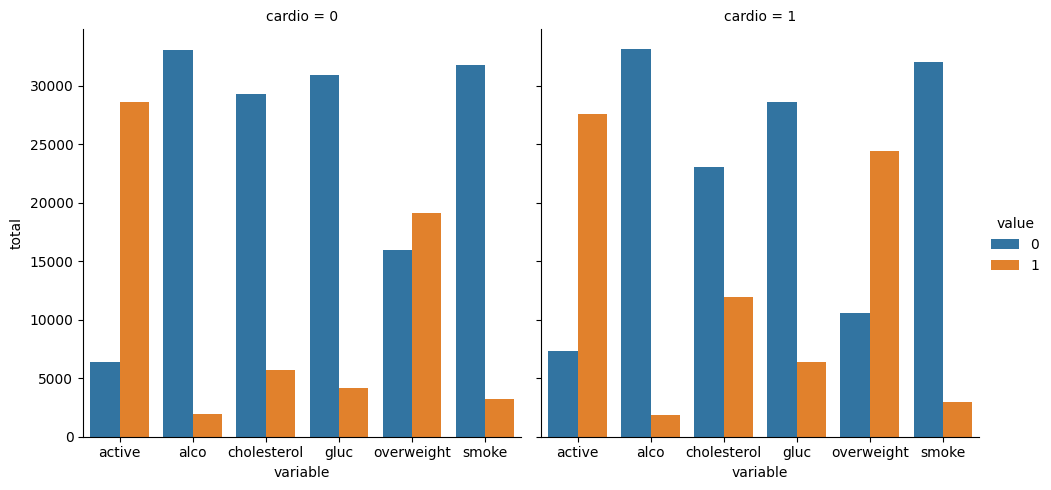

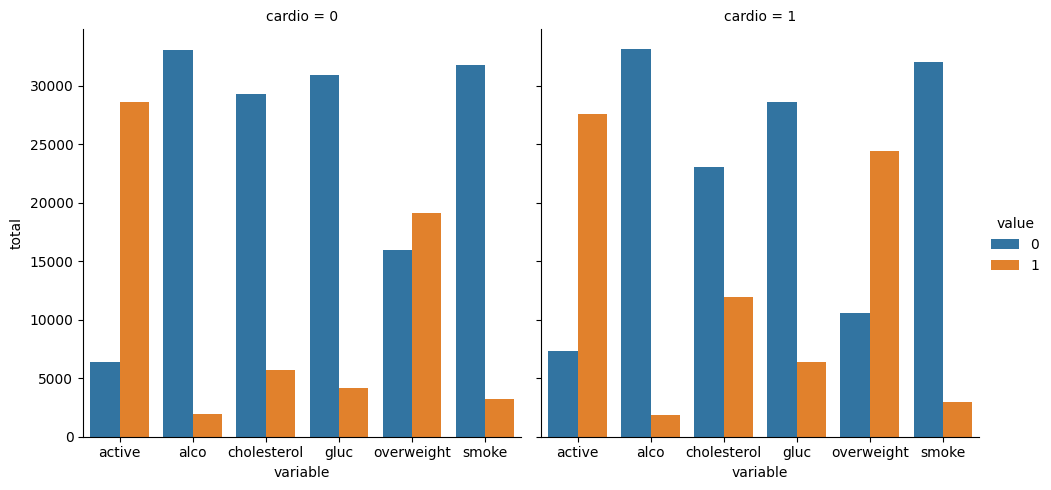

In [6]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol',
    # 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(id_vars = 'cardio',
                     value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],
                     value_name='value')


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat = pd.DataFrame({'total':df_cat.groupby(['cardio', 'variable'])['value'].value_counts()})\
                                     .rename(columns={'cardio':'Cardio','variable':'Variable', 'value':'Value'})\
                                     .reset_index()


    # Draw the catplot with 'sns.catplot()'
    catplot = sns.catplot(data=df_cat, x='variable', y='total', col='cardio', kind='bar', hue='value')


    # Get the figure for the output
    fig = catplot.fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

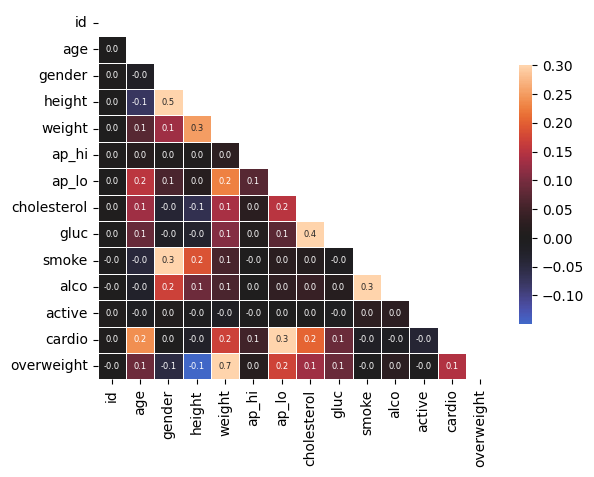

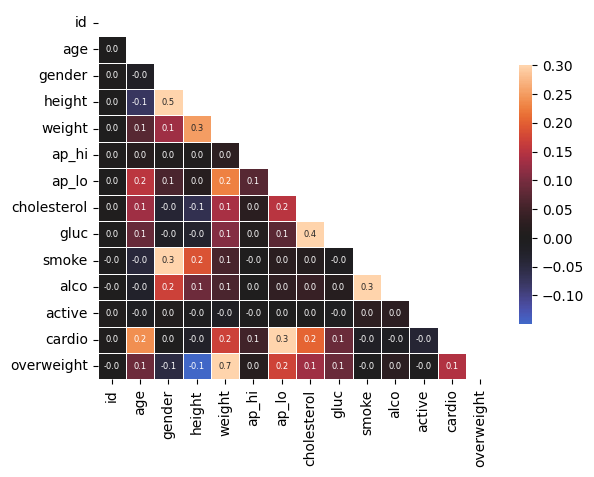

In [7]:
def draw_heat_map():
    # Clean the data
    df_heat = \
        df[(df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df_heat.corr(), dtype=bool))



    # Set up the matplotlib figure
    fig, ax = plt.subplots()

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(data=corr,
                annot=True,
                fmt=".1f",
                linewidth=.5,
                mask=mask,
                annot_kws={'fontsize':6},
                cbar_kws={"shrink": .7},
                square=False,
                center=0,
                vmax=0.30);


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()